# Wstęp do Sztucznej Inteligencji - rok akademicki 2022/2023

Przed rozpoczęciem pracy z notatnikiem zmień jego nazwę zgodnie z wzorem: `NrAlbumu_Nazwisko_Imie_PoprzedniaNazwa`.

Przed wysłaniem notatnika upewnij się, że rozwiązałeś wszystkie zadania/ćwiczenia.

# Temat: Sztuczne Sieci Neuronowe - Lab 3 - Zadania (obowiązkowe)

# Biblioteka Keras. Aspekty uczenia sieci neuronowych.

## Sieci neuronowe w języku Python
Obecnie za sprawą rozwoju i popularności tzw. głębokich sieci neuronowych (Deep Neural Network) dostępnych jest bardzo dużo bibliotek/frameworków do budowy i uczenia sieci neuronowych (TensorFlow, Theano, Spark MLlib, MXNet, Microsoft Cognitive Toolkit, Caffe itp.). Z wielu z nich można korzystać w prosty sposób przy wykorzystaniu języka  Python.  

## Biblioteka Keras (na TensorFlow)
Biblioteka Keras jest wysokopoziomową nakładką na biblioteki takie jak TensorFlow, CNTK (Microsoft Cognitive Toolkit) lub Theano napisaną w języku Python. Domyślnie wykorzystywanym backendem jest TensorFlow i z takiego będziemy korzystać. Biblioteka ta pozwala na:
- Łatwe i szybkie prototypowanie modeli (pełna modularność).
- Wspiera zarówno "klasyczne" sieci neuronowe jak i konwolucyjne czy rekurencyjne. 
- Umożliwia uczenie przy wykorzystaniu CPU oraz GPU.

Keras: https://keras.io/

TensorFlow: https://www.tensorflow.org/

## Szybkie wprowadzenie na przykładzie sieci dla problemu XOR

### Dane:

In [2]:
import numpy as np
data_x = np.array([[-1,-1],[-1,1],[1,-1],[1,1]])  # backpropagation nie lubi zer, bez biasu
data_y = np.array([0,1,1,0])

### Import biblioteki Tensorflow i Keras
Biblioteke Kreas można zaimportować bezpośrednio `import keras` Jednak obecnie bublioteka Keras jest również dostępna jako podmoduł biblioteki Tensorflow.

In [3]:
import tensorflow as tf
print('Tensorflow version:', tf.__version__)
print('Keras z tensorflow version:', tf.keras.__version__)

Tensorflow version: 2.16.1
Keras z tensorflow version: 3.3.3


### Przygotowanie architektury sieci
Stworzenie sieci MLP o dwóch neuronach ukrytych i jednym wyjściowym:

Tworzenie modelu odbywa się na zasadzie budowania modelu z klocków (warstw). Najpierw tworzymy tensor będący warstwą wejściową `Input` a następnie dodajemy do niego kojejne warstwy np. `Dense` (warstwa neuronów typu każdy z każdym). Następnie dysponując tensorem wejściowym i wyjściowym określamy Model. Model można tworzyć też z wykorzystaniem klasy `Sequential`.

In [4]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Input, Dense

In [5]:
x = Input(shape=(2,))  #należy ustawić kształ tensora wejściowego
h = Dense(2, use_bias=True, activation='tanh', kernel_initializer='random_uniform', bias_initializer='random_uniform')(x)   #parametry patrz dokumentacja
y = Dense(1, use_bias=True, activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='random_uniform')(h)  # parametry patrz dokumentacja
# alternatywnie activation można ustawić na None i dodać funkcje aktywacj jako osobną warstwę
mlp = Model(inputs=x, outputs=y)

In [6]:
mlp.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [7]:
m2 = Sequential()
m2.add(Dense(2, use_bias=True, activation='tanh', kernel_initializer='random_uniform', bias_initializer='random_uniform', input_shape=(2,)))
m2.add(Dense(1, use_bias=True, activation='sigmoid', kernel_initializer='random_uniform', bias_initializer='random_uniform'))

c:\Users\ziggs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
m2.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

### Kompilacja modelu
Po stworzeniu modelu należy go skompilować, podczas kompilacji podajemy m.in. rodzaj funkcji używanej do liczenia błędu (`loss`) oraz algorytm wykorzystywany do uczenia (`optimizer`). 

In [9]:
rms = tf.keras.optimizers.RMSprop(learning_rate=0.01)  #lr = learning rate; parametry patrz dokumentacja
mlp.compile(loss='mse', optimizer=rms)  #mse = mean squared error

In [10]:
m2.compile(loss='mse', optimizer=rms) 

### Uczenie
Po kompilacji możemy przystąpić do uczenia za pomocą metody `fit`.

In [11]:
print('rozpoczecie uczenia')
#ustaw verbose=0 aby wyłączyć szczegóły 
hist = mlp.fit(data_x, data_y, epochs=300, verbose=1, batch_size=4)  #  parametry patrz dokumentacja
print('koniec uczenia')
# ponowne wykonanie powoduje douczanie a nie uczenie od nowa

rozpoczecie uczenia
Epoch 1/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 538ms/step - loss: 0.2500
Epoch 2/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.2500
Epoch 3/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2500
Epoch 4/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - loss: 0.2500
Epoch 5/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2500
Epoch 6/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - loss: 0.2500
Epoch 7/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - loss: 0.2500
Epoch 8/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.2500
Epoch 9/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2500
Epoch 10/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2500
Epoch 11/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2500
Epoch 12/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 0.2500
Epoch 13/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.2500
Epoch 14/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.2500
Epoch 15/300
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step - loss: 0.250

Sprawdzenie czego model się nauczył:

In [12]:
pred = mlp.predict(data_x)
print(pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[0.49891087]
 [0.4989258 ]
 [0.4989175 ]
 [0.49893245]]


## Zagadnienie niedouczenia lub przeuczenia sieci
Przykładowy problem aproksymacji funkcji.

### Zwróć uwagę
- W rzeczywistości dane często pochodzą z pomiarów, które obarczone są niepewnością. W poniższym przykładzie modelujemy to poprzez dodanie losowego błędu do wartości funkcji sinus. 

- Funkcja sinus pełni tu rolę rzeczywistego modelu, którego w praktycznych problemach tak naprawdę nie znamy. Próbujemy go odkryć/aproksymować na podstawie dostępnych nam danych. 

- Celem nauki jest osiągnięcie dobrej generalizacji. Tutaj oznacza to, że sieć, na podstawie dostępnych (zaszumionych) przykładów, powinna nauczyć się prawidłowego przebiegu funkcji sinus. 

- Jeśli będziemy uczyć sieć zbyt długo, może pojawić się niekorzystny efekt zwany przeuczeniem. Ma to miejsce gdy sieć po odkryciu głównych zależności/ogólnego przebiegu funkcji, zaczyna dostosowywać się do szumu istniejącego w danych. Można temu przeciwdziałać poprzez odpowiednio wczesne zatrzymanie procesu uczenia. 

### Dane

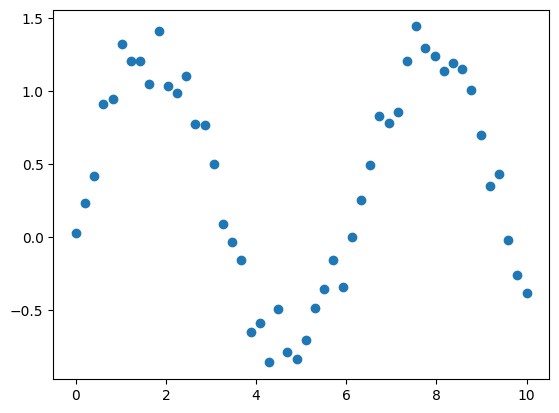

In [13]:
import matplotlib.pyplot as plt
data_x = np.linspace(0, 10, 50)
data_y = np.sin(data_x) + np.random.random(data_x.shape[0])*0.5
fig = plt.figure()
plt.plot(data_x, data_y, 'o')
plt.show()

### Podział na dane uczące i walidacyjne

Dane walidacyjne służą do monitorowania procesu uczenia, sprawdzania jak sieć radzi sobie z danymi, które nie są wykorzystywane do modyfikacji wag.

Jeśli błąd na danych uczących maleje, a na danych walidacyjnych już nie (lub wręcz rośnie), jest to potencjalny sygnał, że sieć jest przeczuczona.

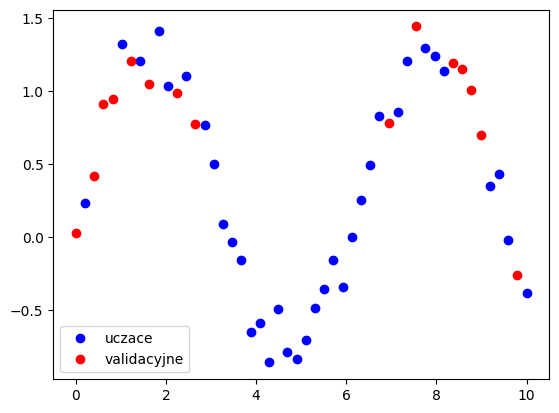

In [14]:
temp = np.arange(50)
np.random.shuffle(temp)
val_x = data_x[temp[35:]]
val_y = data_y[temp[35:]]
data_x = data_x[temp[:35]]
data_y = data_y[temp[:35]]

fig = plt.figure()
plt.plot(data_x, data_y, 'bo', label='uczace')
plt.plot(val_x, val_y, 'ro', label='validacyjne')
plt.legend()
plt.show()

### Model sieci MLP
Mała sieć, 35 neuronów w warstwie ukrytej.

In [15]:
x = Input(shape=(1,))
h = Dense(35, input_dim=1, use_bias=True, activation='tanh', kernel_initializer='random_uniform', bias_initializer='random_uniform')(x)
y = Dense(1, use_bias=True, activation='linear', kernel_initializer='random_uniform', bias_initializer='random_uniform')(h)
model1 = Model(inputs=x, outputs=y)
rms = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model1.compile(loss='mse', optimizer=rms)
model1.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 35)             │            70 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            36 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 106 (424.00 B)

 Trainable params: 106 (424.00 B)

 Non-trainable params: 0 (0.00 B)

### Wizualizacja uczenia

KeyboardInterrupt: 

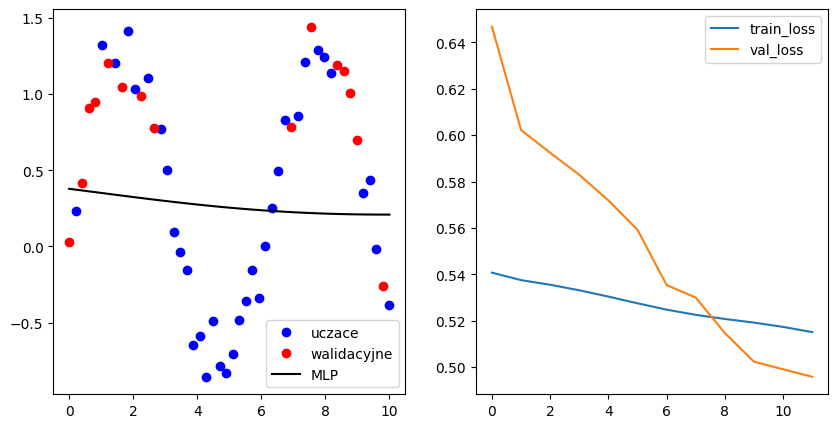

In [16]:
import io
import time
import base64
import IPython

def fig2b64(f):
  data = io.BytesIO()
  f.savefig(data, format='png')
  data.seek(0)
  return base64.b64encode(data.read()).decode()

data_xx = np.linspace(0, 10, 100)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

train_loss = []
val_loss = []

model = model1
n_epochs = 300

hist = model.fit(data_x, data_y, epochs=10, verbose=0, batch_size=35, validation_data=(val_x, val_y))
train_loss.append(model.evaluate(data_x, data_y, verbose=0))
val_loss.append(model.evaluate(val_x, val_y, verbose=0))
pred = model.predict(data_xx)
ax1.plot(data_x, data_y, 'bo', label='uczace')
ax1.plot(val_x, val_y, 'ro', label='walidacyjne')
ax1.plot(data_xx, pred, 'k-', label='MLP')
ax1.legend()
ax2.plot(train_loss, label='train_loss')
ax2.plot(val_loss, label='val_loss')
ax2.legend()
data_str = fig2b64(fig)
rys = IPython.display.display_html(f'<img class="myimage" src="data:image/png;base64,{data_str}"></img>', raw=True)

for i in range(n_epochs):
  IPython.display.clear_output(wait=True)
  #time.sleep(0.2)
  hist = model.fit(data_x, data_y, epochs=10, verbose=0, batch_size=35, validation_data=(val_x, val_y))
  train_loss.append(model.evaluate(data_x, data_y, verbose=0))
  val_loss.append(model.evaluate(val_x, val_y, verbose=0))
  pred = model.predict(data_xx)
  ax1.clear()
  ax2.clear()
  ax1.plot(data_x, data_y, 'bo', label='uczace')
  ax1.plot(val_x, val_y, 'ro', label='walidacyjne')
  ax1.plot(data_xx, pred, 'k-', label='MLP')
  ax1.legend()
  ax2.plot(train_loss, label='train_loss')
  ax2.plot(val_loss, label='val_loss')
  ax2.legend()
  data_str = fig2b64(fig)
  rys = IPython.display.display_html(f'<img class="myimage" src="data:image/png;base64,{data_str}"></img>', raw=True)
plt.close(1)

### Model sieci MLP


Większa sieć, dwie warstwy ukryte odpowiednio 100 i 50 neuronów.

In [17]:
x = Input(shape=(1,))
h1 = Dense(100, input_dim=1, use_bias=True, activation='tanh', kernel_initializer='random_uniform', bias_initializer='random_uniform')(x)
h2 = Dense(50, input_dim=1, use_bias=True, activation='tanh', kernel_initializer='random_uniform', bias_initializer='random_uniform')(h1)
y = Dense(1, use_bias=True, activation='linear', kernel_initializer='random_uniform', bias_initializer='random_uniform')(h2)
model2 = Model(inputs=x, outputs=y)
rms = tf.keras.optimizers.RMSprop(learning_rate=0.001)
model2.compile(loss='mse', optimizer=rms)
model2.summary()

Model: "functional_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 1)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │           200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,301 (20.71 KB)

 Trainable params: 5,301 (20.71 KB)

 Non-trainable params: 0 (0.00 B)

### Wizualizacja uczenia

KeyboardInterrupt: 

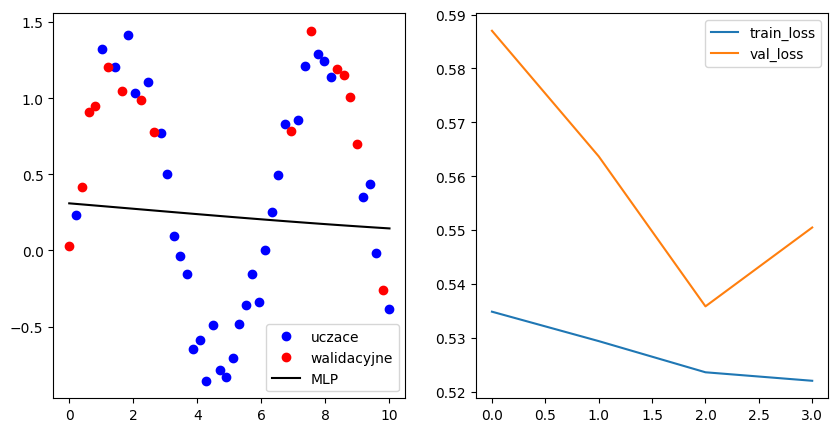

In [18]:
data_xx = np.linspace(0, 10, 100)
fig = plt.figure(figsize=(10,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)

train_loss = []
val_loss = []

model = model2
n_epochs = 300

hist = model.fit(data_x, data_y, epochs=10, verbose=0, batch_size=35, validation_data=(val_x, val_y))
train_loss.append(model.evaluate(data_x, data_y, verbose=0))
val_loss.append(model.evaluate(val_x, val_y, verbose=0))
pred = model.predict(data_xx)
ax1.plot(data_x, data_y, 'bo', label='uczace')
ax1.plot(val_x, val_y, 'ro', label='walidacyjne')
ax1.plot(data_xx, pred, 'k-', label='MLP')
ax1.legend()
ax2.plot(train_loss, label='train_loss')
ax2.plot(val_loss, label='val_loss')
ax2.legend()
data_str = fig2b64(fig)
rys = IPython.display.display_html(f'<img class="myimage" src="data:image/png;base64,{data_str}"></img>', raw=True)

for i in range(n_epochs):
  IPython.display.clear_output(wait=True)
  #time.sleep(0.2)
  hist = model.fit(data_x, data_y, epochs=10, verbose=0, batch_size=35, validation_data=(val_x, val_y))
  train_loss.append(model.evaluate(data_x, data_y, verbose=0))
  val_loss.append(model.evaluate(val_x, val_y, verbose=0))
  pred = model.predict(data_xx)
  ax1.clear()
  ax2.clear()
  ax1.plot(data_x, data_y, 'bo', label='uczace')
  ax1.plot(val_x, val_y, 'ro', label='walidacyjne')
  ax1.plot(data_xx, pred, 'k-', label='MLP')
  ax1.legend()
  ax2.plot(train_loss, label='train_loss')
  ax2.plot(val_loss, label='val_loss')
  ax2.legend()
  data_str = fig2b64(fig)
  rys = IPython.display.display_html(f'<img class="myimage" src="data:image/png;base64,{data_str}"></img>', raw=True)
plt.close(1)

## Kiedy zakończyć uczenie?
Jednym z kluczowych aspektów (poza doborem architektury) jest zdecydowanie kiedy zakończyć uczenie sieci neuronowej. Najpopularniejsza technika polega na obserwacji wartości błedów osiąganych na zbiorze uczącym i zbiorze walidacyjnym. Gdy błąd na zbiorze walidacyjnym przestaje maleć (zazwyczaj zaczyna rosnąć) to znaczy, że sieć zaczyna się przeuczać (traci swoje zdalonośći generalizacyjne) i wtedy należy zakończyć proces uczenia. Taka strategia nazywa się strategią wczesnego zatrzymania (_early stopping_).

## Problemy klasyfikacyjne z wieloma klasami

Baza danych irysów zawiera przykłady z trzech klas. Zwróć uwagę na odpowiednie zakodowanie informacji o etykietach klas dla przykładów za pomocą funkcji `keras.utils.to_categorical`

In [19]:
from sklearn import datasets
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import SGD

iris_db = datasets.load_iris()
print(dir(iris_db))
print(type(iris_db.data)) #dane jako macierz numpy
print(iris_db.data.shape) #kazdy przyklad w wierszu
print(iris_db.feature_names) #nazwy atrybutow (sygnaly wejsciowe sieci)
print(iris_db.data[:10,:]) #podglad
print(iris_db.target_names) #nazwy trzech klas
print(iris_db.target) #etykiety klas zakodowane numerycznie jako 0, 1, 2

#d: zakodowane etykiety klas w sposob umozliwiajacy uczenie sieci
d = tf.keras.utils.to_categorical(iris_db.target, num_classes=3)
print(type(d))
print(d.shape)
print(d[:5,:])

['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']
<class 'numpy.ndarray'>
(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]]
['setosa' 'versicolor' 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
<class 'numpy.ndarray'>
(150, 3)
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


### Warstwa wyjściowa softmax

W warstwie wyjściowej softmax, każdy neuron realizuje sumę ważoną dochodzących do niego sygnałów wejściowych. Następnie, odpowiedzi wszystkich neuronów wyjściowych są przetwarzane zgodnie ze wzorem

$$P(y=j|\bf{x})=\frac{e^{\bf{x}^{T}\bf{w}_j}}{\sum_{k=1}^{K}{e^{\bf{x}^{T}\bf{w}_k}}}$$

gdzie $K$ to liczba neuronów wyjściowych (liczba klas w problemie klasyfikacyjnym), $w_j$ to wagi j-tego neuronu wyjściowego, $x$ to sygnały wejściowe neuronów z warstwy wyjściowej (odpowiedzi poprzedniej warstwy).

Wartości te mogą być interpretowane jako prawdopodobieństwa przynależności danego przykładu (podanego na wejście sieci) do danej klasy, którą reprezentuje j-ty neuron wyjściowy.

Dla takiej warstwy wyjściowej, funkcją straty używaną w trakcie uczenia jest zazwyczaj `categorical_entropy`, która mierzy podobieństwo dwóch rozkładów prawdopodobieństwa przynależności danych trenujących do klas: rzeczywisty (na podstawie zbioru trenującego) oraz ten realizowany przez sieć.

### Zapis i odczyt modelu do/z pliku

W poniższym przykładzie zwróć uwagę na zapis modelu do pliku i jego ponowne wczytanie.

In [20]:
model = Sequential()
model.add(Dense(30, activation='tanh', input_dim=4))
model.add(Dense(3, activation='softmax'))

sgd = SGD(lr=0.01, decay=1e-6, momentum=0.9, nesterov=True)
model.compile(loss='categorical_crossentropy',
              optimizer=sgd,
              metrics=['accuracy'])

model.fit(iris_db.data, d,
          epochs=200,
          batch_size=10)

score = model.evaluate(iris_db.data, d, batch_size=10)
print('model koncowy:',score)

#sprawdzenie czy dziala zapis/odczyt modelu z pliku
model.save('my_model.h5')
from tensorflow.keras.models import load_model
model2 = load_model('my_model.h5')
score2 = model2.evaluate(iris_db.data, d, batch_size=10)
print('model z pliku:',score2)

c:\Users\ziggs\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


ValueError: Argument(s) not recognized: {'lr': 0.01}

## Zadanie 1
Naucz sieć diagnozować cukrzycę.

- Wykorzytaj dane z pliku `pima-indians-diabetes.data.csv`. Dane są również dostępne w `sklearn`. Zaimportuje je jako `diab_db=datasets.load_diabetes()`

- Podziel dostępne dane losowo na dane uczące i testowe (walidacyjne) w proporcji 70% / 30%. Podział danych jest wykonywany raz i jest używany niezmieniony w dalszych obliczeniach dla wszystkich sieci.

- Dobierz jak najlepsze parametry uczenia oraz architektury sieci z jedną oraz z dwiema warstwami ukrytymi (po jednej na każdy rodzaj). Jakość działania sieci oceniamy na podstawie jej wyników na danych testowych. Postaraj się w odpowiednim momencie zatrzymać proces uczenia.

- Czy sieć z dwiema warstwami ukrytymi działa lepiej niż sieć z jedną warstwą ukrytą? Porównania i wnioski przedstaw na podstawie uśrednionych wyników dziesięciu sieci każdego rodzaju (tzn. najpierw ustal architekturę sieci, następnie przeprowadź 10 procesów trenownia, startując za każdym razem z losowych początkowych wag). 

- W dostarczonym kodzie umieść proces uczenia i testowania wybranych architektur sieci.

__Uwaga:__ Przy uczeniu większych modeli warto wykonywać obliczenia z wykorzystaniem karty graficznej. Aby uruchomić notatnik z wykorzystaniem GPU należy wejść do Edit->Notebook settings i zmienić Hardware accelerator na GPU.


TWÓJ KOD TUTAJ:

In [21]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_diabetes
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt
import IPython
import io
import base64

def fig2b64(f):
  data = io.BytesIO()
  f.savefig(data, format='png')
  data.seek(0)
  return base64.b64encode(data.read()).decode()
data_str = fig2b64(fig)
rys = IPython.display.display_html(f'<img class="myimage" src="data:image/png;base64,{data_str}"></img>', raw=True)

NUM_RUNS = 10

diab_db = load_diabetes()
X = diab_db.data
y = diab_db.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

mse_single_results = []
mse_double_results = []
for _ in range(NUM_RUNS):
    IPython.display.clear_output(wait=True)
    model_single = Sequential()
    model_single.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
    model_single.add(Dense(1, activation='linear'))
    model_single.compile(optimizer='adam', loss='mse')
    history_single = model_single.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=32, verbose=0)
    y_pred_single = model_single.predict(X_test)
    mse_single = np.mean((y_pred_single - y_test) ** 2)
    mse_single_results.append(mse_single)
    plt.plot(history_single.history['loss'], label='Train')
    plt.plot(history_single.history['val_loss'], label='Test')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('Model z jedną warstwą ukrytą - Proces uczenia')
    plt.legend()
    plt.show()

KeyboardInterrupt: 

TWOJE KOMENTARZE I WNIOSKI

&copy; Katedra Informatyki, Politechnika Krakowska